# Business understanding

## 1.1 Introduction

The following project analyzes the housing sales of King county. It will try to compare how prices are influenced by different features e.g., bathrooms, bedrooms and such. This features will be tested side by side with the price to see their proportion against each other i.e does the increase in feature A lead to increase/decrease in the price. Does it even have an effect to start with. This will enable us to give the stakeholder the visuals and the recommendations to enable him or her to make the necessary conclusions. 

## 1.2 Problem Statement

The problem statement is to give the stakeholders real estate data which will enable them know where to invest, how to renovate based upon previous patterns which have already occured in the northwestern county real estate business. There is need to identify the trends there in the past and their consequences e.g when the house was put up in front of a water body(waterfront), how fast did it find a customer. Does putting it in front of a waterfront have any positive impact?

## 1.3 Main Objective

The main objective is to select the features which influence the price of a house mostly and then visualize them and put them on a regression scale based on the past data to construct a predictive model to identify how in the future, what will be influencing the real estate business.

## 1.4 Specific Objectives

1.4.1. To identify the most correlated features with the price to create a multilinear regreesion to help us in knowing how the features influence the prices and even influence the customers. </br>
1.4.2 To build a baseline model to identify the most relevant data to be used as the starting point of the analysis. </br>
1.4.3 To use the linear regression metrics to have the appopriate coefficients which will enable us to come up with the relevant recommendations for the stakeholders of the real estates 

## 1.5 Notebook Structure

### 1.5.1 Introduction </br>
### 1.5.2 Problem Statement </br>
### 1.5.3 Main Objective </br>
### 1.5.4 Specific Objectives </br>
### 1.5.5 Importing Libraries </br>
### 1.5.6 Data Understanding </br>
### 1.5.7 Data Cleaning </br>
### 1.5.8 Modelling </br>
### 1.5.9 Regression Results </br>
### 1.5.10 Data Visualizations </br>
### 1.5.11 Conclusions </br>
### 1.5.12 Recommendations </br>
### 1.5.13 References </br>

## 2. Importing Libraries and filtering warnings

In [1]:
#import the relevant libraries
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# 3. Data Understanding

## 3.1 Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# Opening the csv file
data = pd.read_csv("Data/kc_house_data.csv")

# Viewing both the head and the tail of the data
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checking data in tabular form
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Viewing the shape of the data
data.shape

(21597, 21)

In [5]:
# viewing data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<Axes: ylabel='Density'>

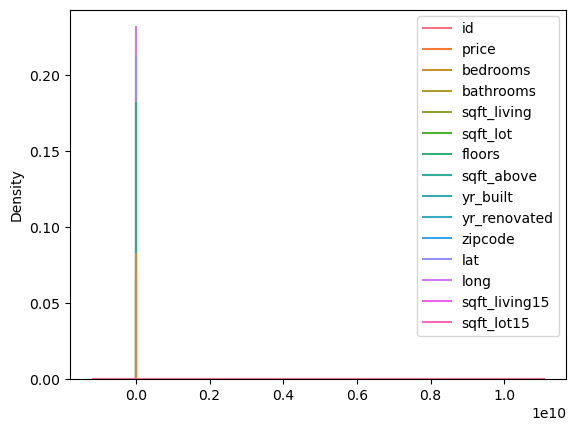

In [6]:
# Let's see how it looks visually
sns.kdeplot(data)

We will compare and contrast this density plot before cleaning and after cleaning later on. </br>
For now, let's clean

# 4. Data cleaning

## 4.1 Missing Values

Let's check for any missing data

In [7]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Waterfront and yr_renovated have missing values. Let's see what type of missing values they have to decide how we are going to handle the situation.

In [9]:
data["waterfront"].value_counts(dropna = False)

waterfront
NO     19075
NaN     2376
YES      146
Name: count, dtype: int64

In [10]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

For the waterfront, let's fill the missing values with unknown i.e a house may have a waterfront (yes), or not (no), or in this case, we don't know

In [11]:
data["waterfront"].fillna("Unknown", inplace = True)
data["waterfront"]

0        Unknown
1             NO
2             NO
3             NO
4             NO
          ...   
21592         NO
21593         NO
21594         NO
21595    Unknown
21596         NO
Name: waterfront, Length: 21597, dtype: object

Now we tackle yr_renovated to see how we will tackle the missing values

In [12]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

In [13]:
data["yr_renovated"].value_counts(dropna = False).sum()

21597

We can not do the same for the missing values for the column of yr_renovated. This is because the missing values take up a whooping 96.5551% of the entire column. The best way to deal with them is to drop the entire column.

In [14]:
data["yr_renovated"].value_counts(dropna = False)

yr_renovated
0.0       17011
NaN        3842
2014.0       73
2013.0       31
2003.0       31
          ...  
1948.0        1
1946.0        1
1976.0        1
1951.0        1
1971.0        1
Name: count, Length: 71, dtype: int64

In [15]:
# Drop the column
data.drop("yr_renovated", axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,Unknown,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


## 4.2 Checking for placeholders

In [16]:
data["sqft_basement"].value_counts(dropna = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [17]:
data["sqft_basement"].replace("?", 0, inplace = True)

## 4.3 Duplicates

In [18]:
data.duplicated().any()

False

There are no duplicates in our data

## 4.4 Removing outliers

### Filter data for yr_built 
Having houses built before 1950 will not make much sense. This is because mortgages at this time were changing with the end of world war two and have been rising quite steadly ever since

In [19]:
# filter data above 2000
data = data[data["yr_built"] > 1950]

## 4.5 Removing irrelevant columns

There are some columns which really don't count. They have very minimal to no effect at all on the final data. E.g date. </br>
Also zipcode. No one stays in a given location because of what the zipcode is </br>
Id doesn't matter here because; 
1. It doesn't influence the price of a house.
2. There are no duplicates

In [20]:
# Dropping date, zipcode, id
columns_to_drop = data[["zipcode", "id", "date"]]
for column in columns_to_drop:
    data = data.drop(column, axis = 1)

## 4.6 Fixing messy columns

In [21]:
print(data["grade"].unique())

['7 Average' '8 Good' '11 Excellent' '9 Better' '6 Low Average'
 '10 Very Good' '12 Luxury' '4 Low' '5 Fair' '13 Mansion']


In [22]:
data["grade"] = data["grade"].str.split(n = 1).str[0]

data["grade"] = pd.to_numeric(data["grade"])
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,Average,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11,3890,1530.0,2001,0.0,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,Unknown,NONE,Average,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


## 4.7 Converting categorical data into numeric to enable the measuring of coefficients

In [23]:
data["waterfront"].unique()

array(['Unknown', 'NO', 'YES'], dtype=object)

In [24]:
data["view"].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [25]:
# Converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

numerical_columns = []
categorical_columns = data[["waterfront", "view", "condition"]]

for column in categorical_columns:
    if data[column].dtype == "object":
        data[column] = label_encoder.fit_transform(data[column])

print(data)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0       221900.0         3       1.00         1180      5650     1.0  \
1       538000.0         3       2.25         2570      7242     2.0   
3       604000.0         4       3.00         1960      5000     1.0   
4       510000.0         3       2.00         1680      8080     1.0   
5      1230000.0         4       4.50         5420    101930     1.0   
...          ...       ...        ...          ...       ...     ...   
21592   360000.0         3       2.50         1530      1131     3.0   
21593   400000.0         4       2.50         2310      5813     2.0   
21594   402101.0         2       0.75         1020      1350     2.0   
21595   400000.0         3       2.50         1600      2388     2.0   
21596   325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built   
0               1     4          0      7        1180 

In [26]:
data["waterfront"].unique()

array([1, 0, 2])

In [27]:
data["grade"].unique()

array([ 7,  8, 11,  9,  6, 10, 12,  4,  5, 13])

In [28]:
data["condition"].unique()

array([0, 4, 2, 1, 3])

## 4.7 Final data

In [29]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1,4,0,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,4,0,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0,4,4,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,4,0,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,4,0,11,3890,1530.0,2001,0.0,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,4,0,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0,4,0,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0,4,0,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1,4,0,8,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


In [30]:
corr_matrix = round(data.corr(), 2)
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.00,0.30,0.55,0.72,0.12,0.22,0.12,-0.31,-0.03,0.70,0.62,0.29,0.17,0.11,0.32,0.06,0.60,0.11
bedrooms,0.30,1.00,0.48,0.56,0.02,0.07,-0.00,-0.09,0.03,0.30,0.45,0.31,0.04,0.03,0.01,0.08,0.40,0.02
bathrooms,0.55,0.48,1.00,0.73,0.09,0.47,0.03,-0.17,-0.20,0.63,0.66,0.25,0.52,0.04,0.09,0.14,0.54,0.08
sqft_living,0.72,0.56,0.73,1.00,0.20,0.28,0.05,-0.25,-0.10,0.75,0.87,0.40,0.28,0.05,0.10,0.20,0.77,0.20
sqft_lot,0.12,0.02,0.09,0.20,1.00,-0.02,0.01,-0.06,0.02,0.14,0.20,0.03,-0.00,0.01,-0.06,0.22,0.14,0.76
floors,0.22,0.07,0.47,0.28,-0.02,1.00,0.00,0.01,-0.36,0.41,0.47,-0.31,0.70,-0.02,0.09,0.07,0.22,-0.03
waterfront,0.12,-0.00,0.03,0.05,0.01,0.00,1.00,-0.11,0.00,0.04,0.02,0.05,-0.02,0.03,0.00,-0.01,0.04,0.01
view,-0.31,-0.09,-0.17,-0.25,-0.06,0.01,-0.11,1.00,-0.03,-0.23,-0.14,-0.25,0.06,-0.04,-0.02,0.07,-0.23,-0.06
condition,-0.03,0.03,-0.20,-0.10,0.02,-0.36,0.00,-0.03,1.00,-0.19,-0.19,0.15,-0.46,-0.05,-0.07,-0.05,-0.09,0.02
grade,0.70,0.30,0.63,0.75,0.14,0.41,0.04,-0.23,-0.19,1.00,0.75,0.13,0.41,0.03,0.17,0.13,0.71,0.13


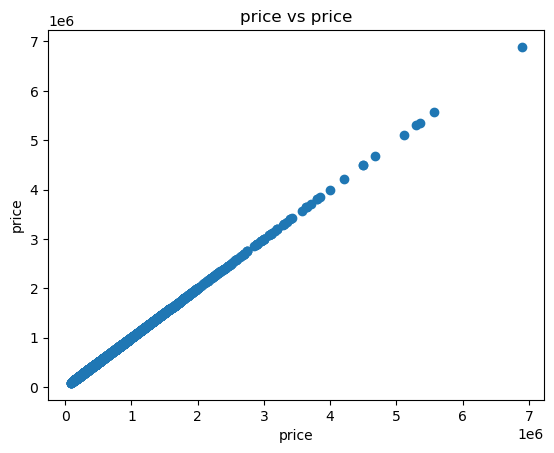

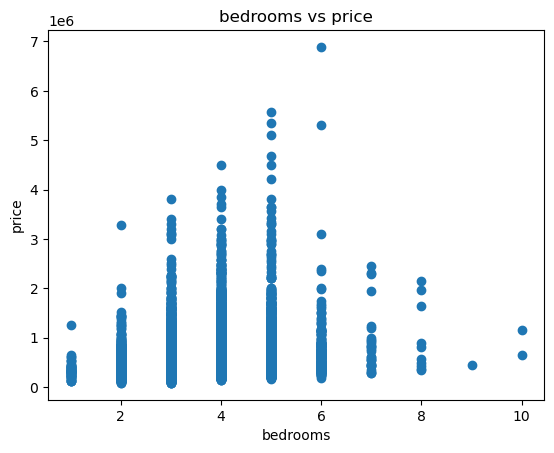

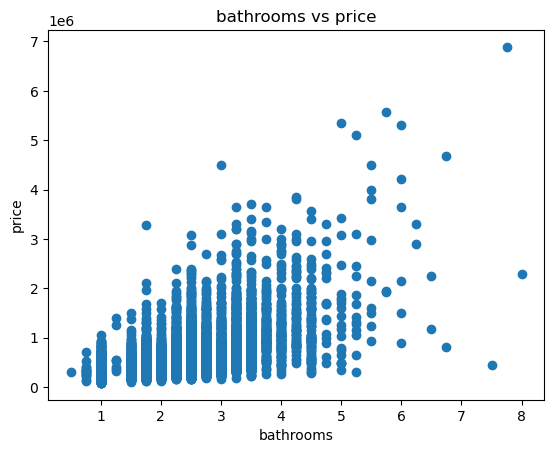

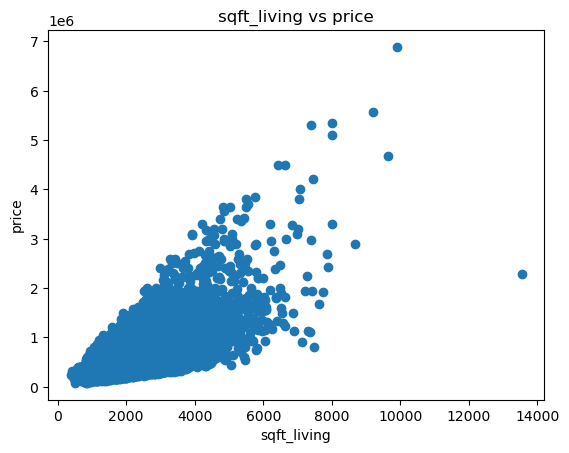

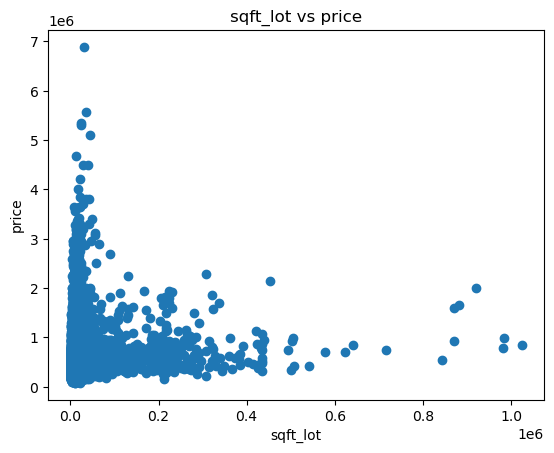

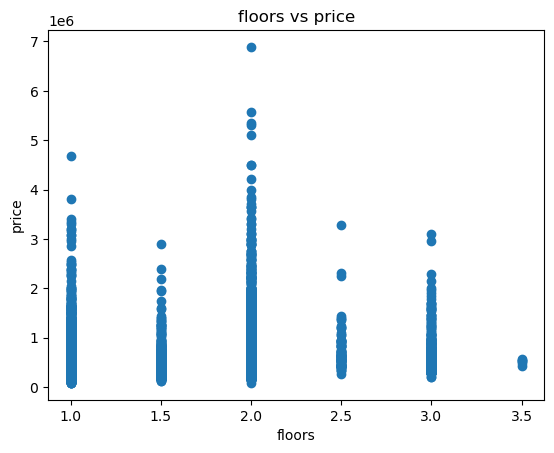

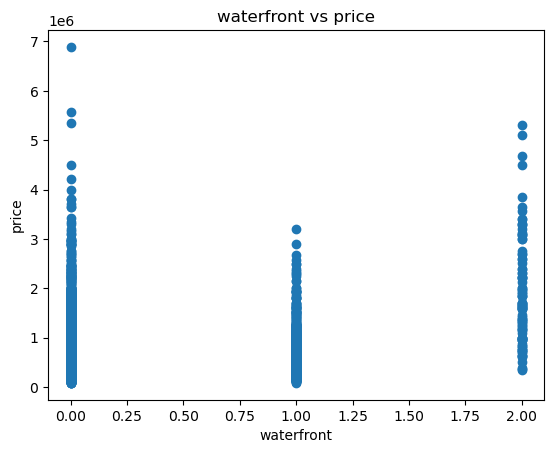

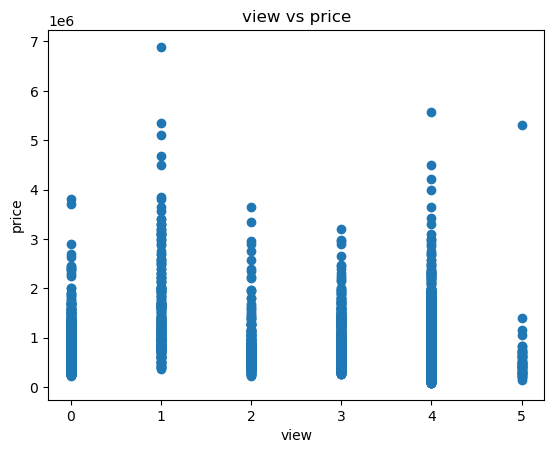

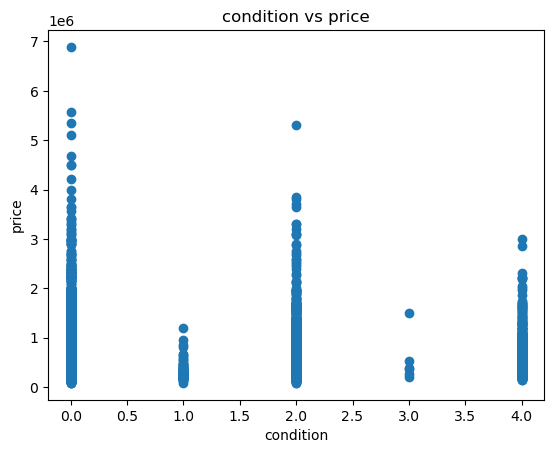

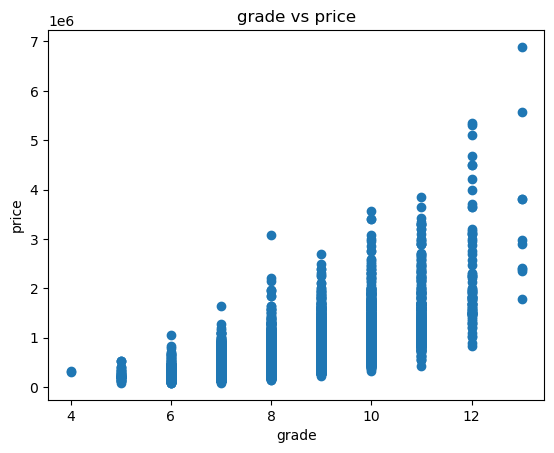

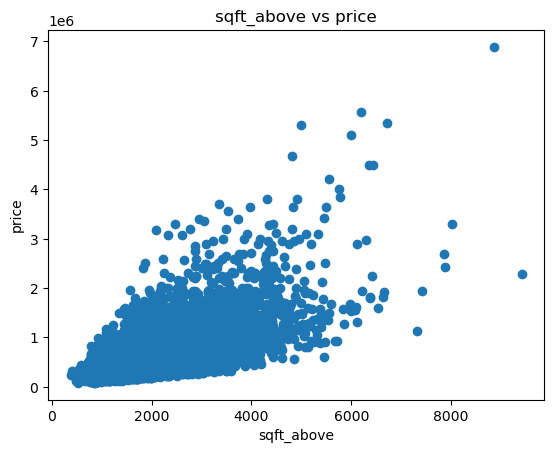

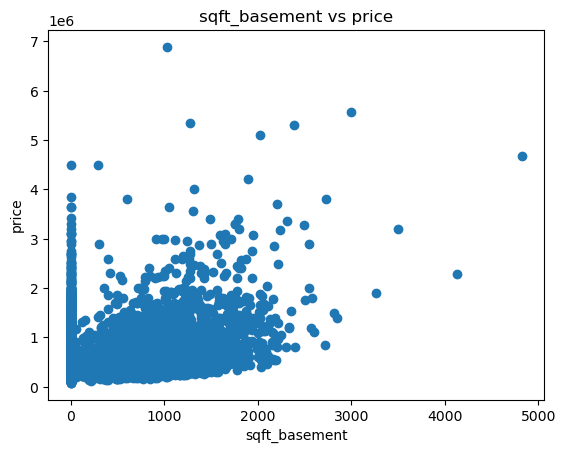

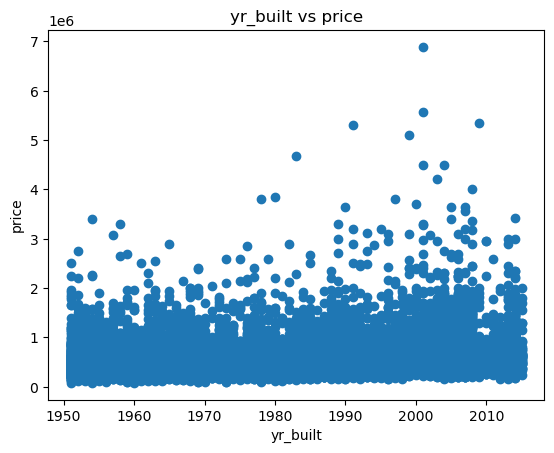

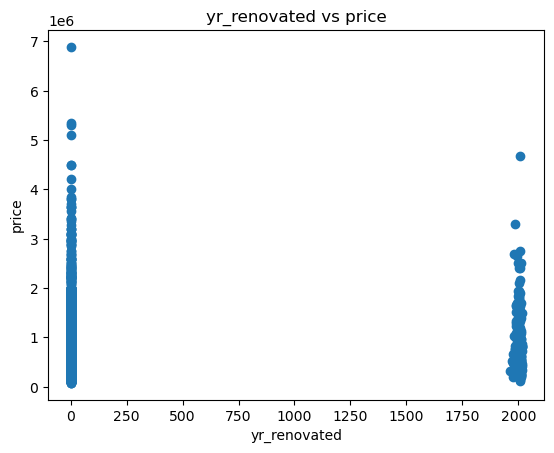

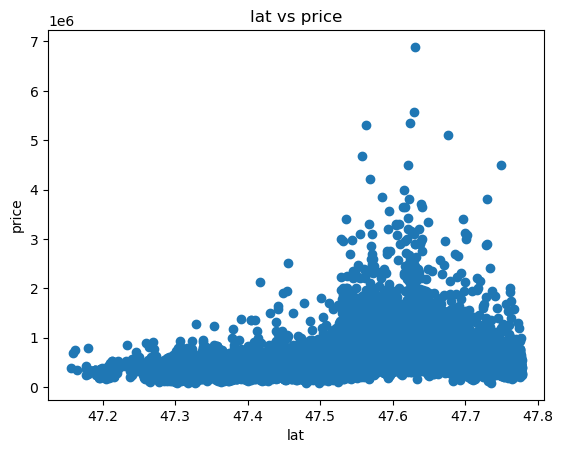

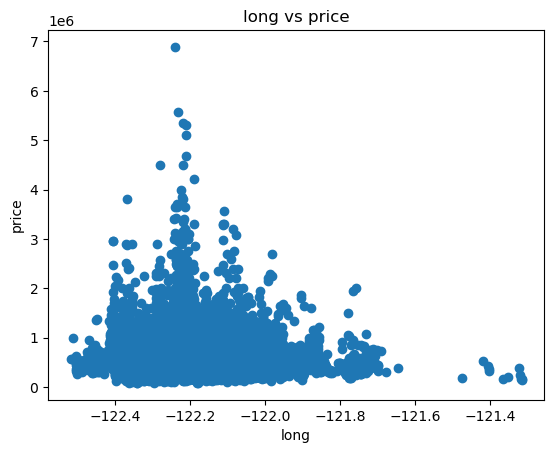

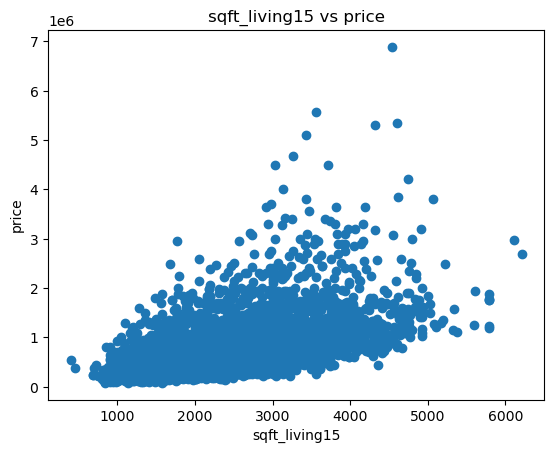

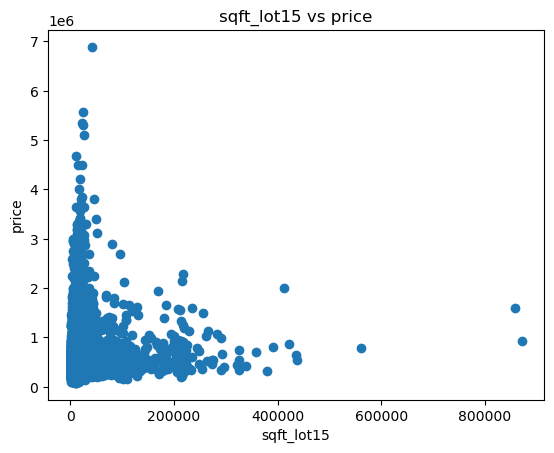

In [31]:
# Let's see how it looks visually
plt.figure()
for column in corr_matrix.columns:
    plt.scatter(x = data[column].astype(float), y = data["price"].astype(float), label = "f{column} vs price")
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"{column} vs price")
    plt.show()

# 5. Modelling

Let's identify the most relevant data to work with and why

1. Price </br>
Price (in some datasets; sales) is the most important since other columns are measured against it. We will use it as the TARGET VARIABLE.
2. Bedrooms </br>
The number of rooms a building has highly influences its price tag.
3. Floors </br>
The more a building has floors the more it will cost.
4. sqft_lot </br>
The larger the square lot of a building, the more it will cost.
5. yr_renovated </br>
The more recent a house is renovated, the more expensive it will be as opposed to a house renovated a long time ago. Say in the 2000s.

Linear Relationship between this data features and the target variable (price)

In [32]:
price_corr = data[["bedrooms", "sqft_lot", "floors", "yr_renovated", "price"]]
price_corr.corr()

,bedrooms,sqft_lot,floors,yr_renovated,price
bedrooms,1.000000,0.021423,0.067131,0.030165,0.300832
sqft_lot,0.021423,1.000000,-0.019611,0.005985,0.122011
floors,0.067131,-0.019611,1.000000,-0.024508,0.218454
yr_renovated,0.030165,0.005985,-0.024508,1.000000,0.114447
price,0.300832,0.122011,0.218454,0.114447,1.000000


In [33]:
# Checking how many houses have each number of bedrooms
data["bedrooms"].value_counts()

bedrooms
3     7896
4     5685
5     1324
2     1214
6      200
1       52
7       29
8       10
10       2
9        1
Name: count, dtype: int64

In [34]:
y = data["price"]
x = data["bedrooms"]

bedrooms_models = sm.OLS(y, sm.add_constant(x)).fit()

In [35]:
bedrooms_models.params

const        82794.405975
bedrooms    131295.856868
dtype: float64

In [36]:
bedrooms_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1633.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:38:17   Log-Likelihood:            -2.3262e+05
No. Observations:               16413   AIC:                         4.653e+05
Df Residuals:                   16411   BIC:                         4.653e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.279e+04   1.16e+04      7.131      0.000       6e+04    1.06e+05
bedrooms    1.313e+05   3249.081     40.410      0.000    1.25e+05    1.38e+05
==============================================================================
Omnibus:                    13674.496   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           607067.126
Skew:                           3.751   Prob(JB):                         0.00
Kurtosis:                      31.834   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
"""

"""

'\n\n'